In [1]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt   
from statsmodels.tsa.stattools import adfuller

##通过数据的前150行计算p、d、q取值
filename = r'88--9.csv'
data = pd.read_csv(filename, index_col = 'Local Datetime',parse_dates=['Local Datetime']).iloc[:150,:]

#画出折线图
data.plot()
plt.figure(figsize=(12,10))
plt.show()
#画出自相关性图
plot_acf(data)
plt.show()

#原始序列的平稳性检测   
print('原始序列的检验结果为：',adfuller(data['mean-speed']))
#返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore 
#单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平稳序列
#原假设是存在单位根，不平稳
# ADF=Augmented Dickey-Fuller test

#对数据进行差分后得到 自相关图和 偏相关图
D_data = data.diff().dropna()
D_data.columns = [u'folw-chafen']
#画出差分后的时序图
D_data.plot()   
plt.show()

#画出自相关图
plot_acf(D_data)    
plt.show()
#画出偏相关图
plot_pacf(D_data) 
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data[u'folw-chafen']))   #平稳性检验
#一阶差分后的序列的时序图在均值附近比较平稳的波动， 自相关性有很强的短期相关性， 单位根检验 p值小于 0.05 ，所以说一阶差分后的序列是平稳序列#
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 1)) #返回统计量和 p 值
#pacf找p值 acf找q值

<Figure size 640x480 with 1 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 640x480 with 1 Axes>

原始序列的检验结果为： (-1.0860279609169319, 0.7206115093938613, 13, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 536.843036508143)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

差分序列的ADF 检验结果为：  (-5.131897716130273, 1.208979428699276e-05, 12, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 533.3288653177153)
差分序列的白噪声检验结果： (array([14.47301482]), array([0.00014218]))


In [2]:
#对模型进行定阶
print(D_data)
#一般阶数不超过 length /10，但由于计算性能限制，故暂取leneth/30
pmax = int(len(D_data) / 30)    
qmax = int(len(D_data) / 30)
bic_matrix = []

#计算不同p、q值对应的准确性收益
#print(bic_matrix)
for i in range(pmax+1):
    temp=[]
    for j in range(qmax+1):
        try:
            a=ARIMA(data,(i,1,j)).fit().bic
            temp.append(a)
        except:
            temp.append(None)
        finally:
            bic_matrix.append(temp)
#print(bic_matrix)


bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1
#建立ARIMA 模型，ARIMA(0,1,1)
model = ARIMA(data, (p,1,q)).fit()
#     model.summary2()        #生成一份模型报告
#     model.forecast(1)   #进行1个时间单位的预测， 返回预测结果， 标准误差， 和置信区间

print('predict data:')
print((model.forecast(1)[0][0]))


                     folw-chafen
Local Datetime                  
2023-06-29 00:05:00    -1.796995
2023-06-29 00:10:00     0.679896
2023-06-29 00:15:00    -2.137014
2023-06-29 00:20:00     2.654676
2023-06-29 00:25:00     0.171806
...                          ...
2023-06-29 12:55:00     0.017447
2023-06-29 13:00:00     1.085217
2023-06-29 13:05:00    -1.457493
2023-06-29 13:10:00     1.824737
2023-06-29 13:15:00    -0.041803

[149 rows x 1 columns]


/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

BIC 最小的p值 和 q 值：0,2
predict data:
7.842758873253952


/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/opt/tljh/

           0          1
0   6.942054   7.831451
1   8.290372   7.701237
2   8.919938   7.740075
3   7.750221   7.859777
4   7.299270   7.803067
..       ...        ...
95  9.871873  10.019384
96  9.078010   9.967204
97  9.543133   9.552907
98  8.350936   9.559242
99  9.052114   8.977286

[100 rows x 2 columns]


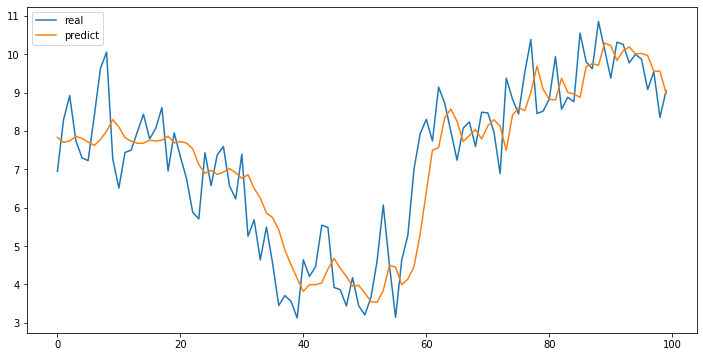

In [3]:
p=0
d=1
q=1
result1=[]
for i in range(100):
    temp=[]
    data = pd.read_csv(filename,  index_col = 'Local Datetime',parse_dates=['Local Datetime']).iloc[i:150+i,:]
    model = ARIMA(data, (p,d,q)).fit()
    a = pd.read_csv(filename,  index_col = 'Local Datetime',parse_dates=['Local Datetime']).iloc[150+i:151+i,:].values[-1][0]
    b = model.forecast(1)[0][0]
    temp.append(a)
    temp.append(b)
    result1.append(temp)
result1=pd.DataFrame(result1)
print(result1)

plt.figure(figsize=(12,6))
line1=plt.plot(result1[:][0],label='real')
line2=plt.plot(result1[:][1],label='predict')
plt.legend()
plt.show()

In [4]:
#  Root Mean squared error   RMSE
a=0
b1=0
aa=result1.values
for i in range(0,100,1):
    a=a+(aa[i,0]-aa[i,1])**2
b1=(a/100)**0.5
print('result1_RMSE(Root Mean squared error)')
print(b1)
print('')
def RE(r,p):
    if r>p:
        return (r-p)/r
    else:
        return (p-r)/r

rt1=[]
for i in result1.values:
    temp=[]
    for j in i:
        temp.append(j)
    temp.append(RE(i[0],i[1]))
    rt1.append(temp)

c=0
sum=0
for i in rt1:
    if i[-1]!=float('inf'):
        s=float(i[-1])
        sum+=s
        c+=1
print('result1_MAPE(Mean absolute percentage error)')
print(c)
print(sum/c)


result1_RMSE(Root Mean squared error)
0.9897197223951537

result1_MAPE(Mean absolute percentage error)
100
0.12529233819358349
